# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [23]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

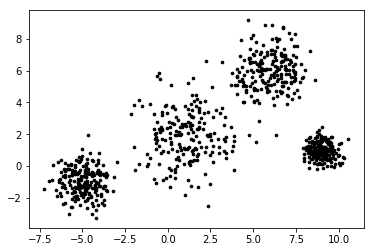

In [8]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed =5
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

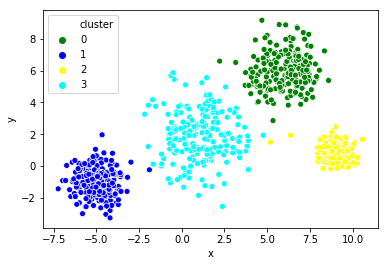

In [58]:
# your code here
from sklearn.cluster import KMeans
k = 4
c = 2
np.random.seed = 6

centers = np.random.randn(k,c)*np.std(data) + np.mean(data)
model = KMeans(n_clusters=k,random_state=6,init=centers,n_init=1).fit(data)

df = pd.DataFrame({'x':data[:,0], 'y':data[:,1], 'cluster':model.labels_})
cols =['green', 'blue', 'yellow', 'cyan']
sns.scatterplot(x ='x',y='y',hue='cluster',data=df,palette=cols)
None

## 2. Visualise the clustering results in each iteration

You need to implement the process of k-means clustering.  Implement each iteration as a seperate cell, assigning each data point to the closest centre, then updating the cluster centres based on the data, then plot the new clusters.

Replace this text with your explaination of the algorithm.  The resulting notebook should provide a good explanation and demonstration of the K-means algorithm.

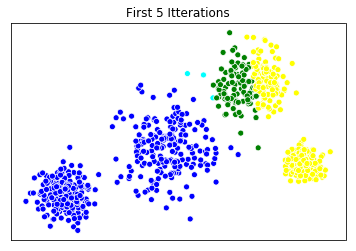

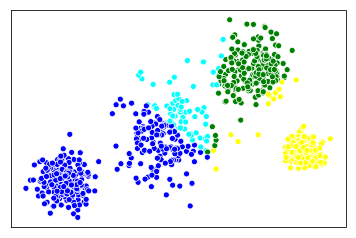

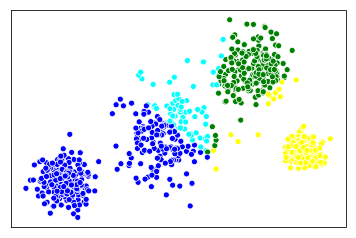

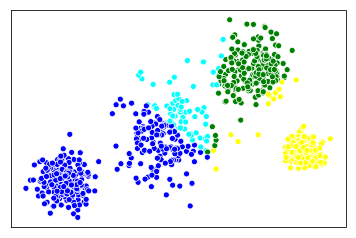

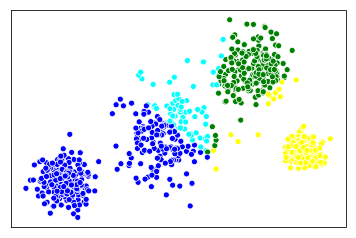

In [107]:
def showSimple():
    plt.tick_params(axis='both', which='both', bottom=False,     left=False,labelbottom=False,labelleft=False) 
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()
    
def iterate(data,centroids,steps=1):
    model = KMeans(n_clusters=k,random_state=6,max_iter=steps,init=centroids,n_init=1).fit(data)
    df = pd.DataFrame({'x':data[:,0], 'y':data[:,1], 'cluster':model.labels_})
    sns.scatterplot(x ='x',y='y',hue='cluster',legend=False,data=df,palette=cols)
    return model.cluster_centers_
                       
def getClosestCent(e,centroids):
        smallest,currId = 10**10,-1
        for i in range(0,len(centroids)):
            dist = np.linalg.norm(e-centroids[i])
            if dist < smallest: #euclidan distance
                smallest,currId = dist,i
        return currId

sns.scatterplot(x ='x',y='y',hue='cluster',palette=cols,legend=False,data=pd.DataFrame({'x':data[:,0], 'y':data[:,1], 'cluster':[getClosestCent(e,centers) for e in data]}))
plt.title('First 5 Itterations')
showSimple()

for i in range(0,4):
    center = iterate(data,centers)
    showSimple()
None

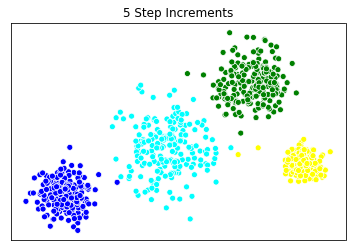

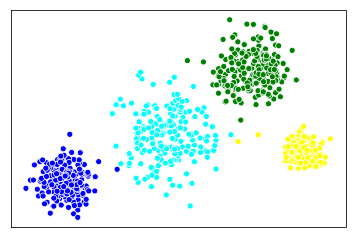

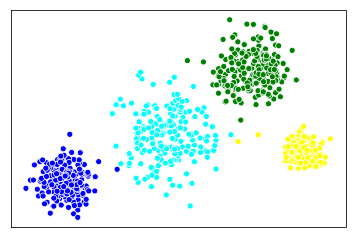

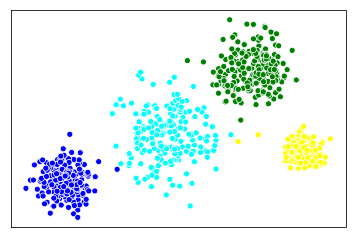

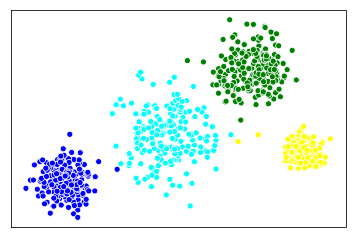

In [110]:
plt.title('5 Step Increments')

for i in range(0,5):
    center = iterate(data,centers,steps=10)
    showSimple()
None